In [0]:
#IMPORTING ALL THE LIBRARIES AS NEEDED
import torch.nn as nn
import torch
import numpy as np
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
from torchvision import transforms
import torch.nn.functional as F 
import time
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [7]:
#SETTING UP THE DATA

#WE'VE PRE-PROCESSED THE THE DATA: TO TENSOR AND NORMALIZED, FOR GETTING BETTER RESULTS
transformz=transforms.Compose([transforms.ToTensor(),transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])
orig_data = ImageFolder(root='/content/drive/My Drive/images_3.0',transform=transformz)
#orig_data = ImageFolder(root=r'C:\Users\mask2\Downloads\images_3.0',transform=transformz)

#TEST TRAIN SPLIT USING SKLEARN 80-20%
train_set,test_set= train_test_split(orig_data,test_size=0.2,shuffle=True)

print(orig_data.classes)
print(len(train_set))
print(len(test_set))

#TRAIN-TEST LOSS & TRAIN-TEST ACCURACY ARRAYS FOR PLOTTING
Train_loss=[]
Test_loss=[]
Train_accuracy=[]
Test_accuracy=[]

['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
8000
2000


In [8]:
#WE'VE USED A RESNET18 MODEL
import torchvision.models as models
test_model = models.resnet18(pretrained=False)
test_model.fc = nn.Linear(in_features=512, out_features=10)
print(test_model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [0]:
#HYPER PARAMETERS
hyperP = dict()
hyperP['numEpoch'] = 120
hyperP['learning_rate'] = 0.0001
hyperP['batchSize'] = 32

In [0]:
#MODEL PARAMETERS
myModel=test_model

#CROSS ENTROPY LOSS
myLoss=nn.CrossEntropyLoss()

#DATA-LOADER 
myLoader_train = DataLoader(train_set, shuffle=True,batch_size=hyperP['batchSize'])
myLoader_test = DataLoader(test_set, shuffle=True,batch_size=hyperP['batchSize'])

#ADAM OPTIMIZER
optimizer = torch.optim.Adam(myModel.parameters(),lr=hyperP['learning_rate'])

In [18]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
myModel=myModel.to(device)
#TRAINING
for epoch in range(hyperP['numEpoch']):
  print('-- epoch '+str(epoch))
  running_loss_train = 0.0
  accuracy_train = 0.0
  running_loss_test = 0.0
  accuracy_test = 0.0
  myModel.train()
  for X,y in myLoader_train:
    X = X.to(device)
    optimizer.zero_grad()
    score = myModel(X)
    score = score.cpu()
    loss = myLoss(score, y)
    running_loss_train += loss.detach().numpy()
    loss.backward()
    optimizer.step()
    accuracy_train += (score.argmax(dim=1) == y).sum().numpy()

  myModel.eval()
  for X,y in myLoader_test:
    X=X.to(device)
    score = myModel(X)
    score = score.cpu()
    loss = myLoss(score, y)
    running_loss_test += loss.detach().numpy()
    accuracy_test += (score.argmax(dim=1) == y).sum().numpy()

  loss_train = running_loss_train/len(myLoader_train)
  loss_test = running_loss_test/len(myLoader_test)
  accuracy_train /= len(train_set)
  accuracy_test /= len(test_set)
  Train_loss.append(loss_train)
  Test_loss.append(loss_test)
  Train_accuracy.append(accuracy_train)
  Test_accuracy.append(accuracy_test)
  print(' loss (train, test): {:.4f}, {:.4f}'.format(loss_train, loss_test))
  print(' accuracy (train, test): {:.4f}, {:.4f}'.format(accuracy_train, accuracy_test))

-- epoch 0
 loss (train, test): 0.0238, 1.4639
 accuracy (train, test): 0.9922, 0.7250
-- epoch 1
 loss (train, test): 0.0334, 1.2904
 accuracy (train, test): 0.9890, 0.7400
-- epoch 2
 loss (train, test): 0.0300, 1.2397
 accuracy (train, test): 0.9905, 0.7315
-- epoch 3
 loss (train, test): 0.0127, 1.2731
 accuracy (train, test): 0.9955, 0.7455
-- epoch 4
 loss (train, test): 0.0123, 1.1944
 accuracy (train, test): 0.9958, 0.7535
-- epoch 5
 loss (train, test): 0.0168, 1.3824
 accuracy (train, test): 0.9940, 0.7295
-- epoch 6
 loss (train, test): 0.0563, 1.7160
 accuracy (train, test): 0.9818, 0.6815
-- epoch 7
 loss (train, test): 0.0353, 1.1801
 accuracy (train, test): 0.9862, 0.7545
-- epoch 8
 loss (train, test): 0.0103, 1.1694
 accuracy (train, test): 0.9958, 0.7690
-- epoch 9
 loss (train, test): 0.0128, 1.2360
 accuracy (train, test): 0.9950, 0.7490
-- epoch 10
 loss (train, test): 0.0332, 1.4463
 accuracy (train, test): 0.9895, 0.7245
-- epoch 11
 loss (train, test): 0.0219, 1

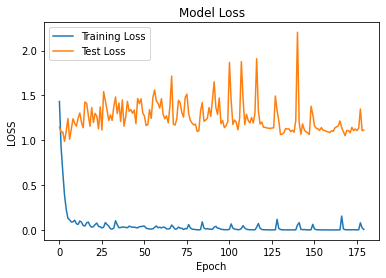

In [19]:
from google.colab import files
plt.plot(Train_loss,label='Training Loss')
plt.plot(Test_loss,label='Test Loss')
plt.xlabel("Epoch")
plt.ylabel("LOSS")
plt.title('Model Loss')
plt.legend()
plt.savefig('Loss_Model_2D_1.0.png',dpi=300)
files.download("Loss_Model_2D_1.0.png")
plt.show()

78.14999999999999%


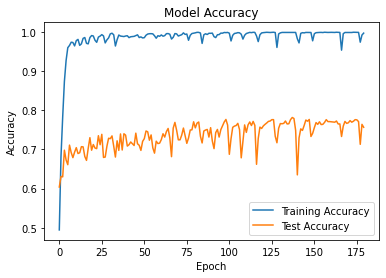

In [20]:
plt.plot(Train_accuracy,label = "Training Accuracy")
plt.plot(Test_accuracy,label = "Test Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title('Model Accuracy')
plt.legend()
plt.savefig('Accuracy_Model_2D_1.0.png',dpi=300)
files.download("Accuracy_Model_2D_1.0.png")

print(str(max(Test_accuracy)*100)+str('%'))

[[134.   1.   6.   3.   8.   7.   0.   5.   7.  13.]
 [  0. 164.   2.   1.   0.  12.   0.   0.   0.   0.]
 [  5.   2. 127.   8.   2.  22.   0.   3.   3.  19.]
 [  6.   2.   6. 148.   8.   1.   1.  17.   7.   9.]
 [  2.   0.   0.  11. 172.   0.   2.   7.   4.   5.]
 [  7.   5.   2.   4.   2. 173.   1.   2.   1.   5.]
 [  0.   0.   4.   1.   7.   2. 176.   4.   0.  15.]
 [  1.   3.   6.  24.  11.   3.   1. 133.   7.   5.]
 [  5.   0.   8.   9.  10.   3.   1.   9. 170.   3.]
 [ 11.   3.  35.  19.  12.   1.   2.  10.   6. 116.]]
naccuracy=0.7565; misclass=0.2435


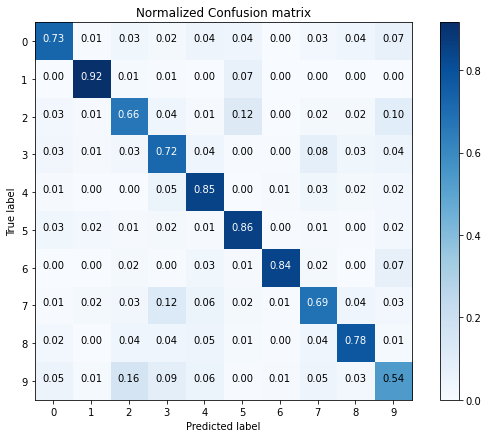

In [21]:
Numclasses=10
confusion_matrix=torch.zeros(Numclasses,Numclasses)
with torch.no_grad():
    for i,(input,classes) in enumerate (myLoader_test):
          input=input.to(device)
          classes=classes.to(device)
          output=myModel(input)
          _,pred=torch.max(output,1)
          for t,p in zip(classes.view(-1),pred.view(-1)):
            confusion_matrix[t.long(),p.long()] += 1

b=confusion_matrix.numpy()
print(b)

def plot_confusion_matrix(cm,target_names,title='Confusion matrix',cmap=None,normalize=True):
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=0)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.2f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    print('naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass) )
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')#'
    plt.savefig('Confusion_Matrix_2D_1.0.png',dpi=300)
    files.download("Confusion_Matrix_2D_1.0.png")
    plt.show()
    
import numpy as np

labels =np.array([0,1,2,3,4,5,6,7,8,9])


plot_confusion_matrix(b,labels,title='Normalized Confusion matrix',cmap='Blues')